<a href="https://colab.research.google.com/github/anderomeda371/firstrepo/blob/main/8_23_Student_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Efficiency According to Past result and Hours Studied

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset (Student_Performance)

In [62]:
dataset=pd.read_csv("/content/Student_Performance.csv")
dataset.head()
dataset.shape
dataset.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

# Data Processing

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [64]:
dataset.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [65]:
dataset.duplicated().sum()

127

# Drop Duplicated Data

In [66]:
dataset.drop_duplicates(inplace=True)

# Head of dataset

In [67]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,9873.0,4.992100,2.589081,1.0,3.0,5.0,7.0,9.0
Previous Scores,9873.0,69.441102,17.325601,40.0,54.0,69.0,85.0,99.0
Sleep Hours,9873.0,6.531652,1.697683,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,9873.0,4.583004,2.867202,0.0,2.0,5.0,7.0,9.0
Performance Index,9873.0,55.216651,19.208570,10.0,40.0,55.0,70.0,100.0


In [68]:
dataset.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Visualize

Check for Outliers

<Axes: >

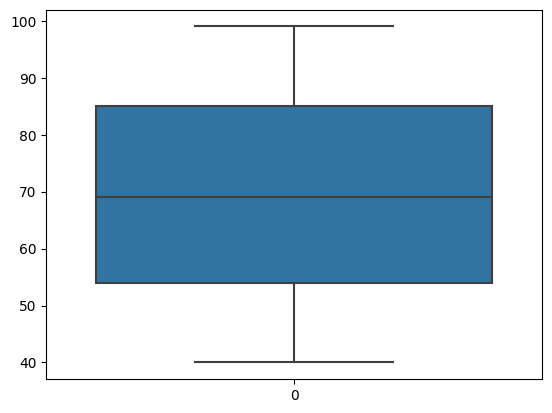

In [70]:
sns.boxplot(dataset["Previous Scores"])

<Axes: >

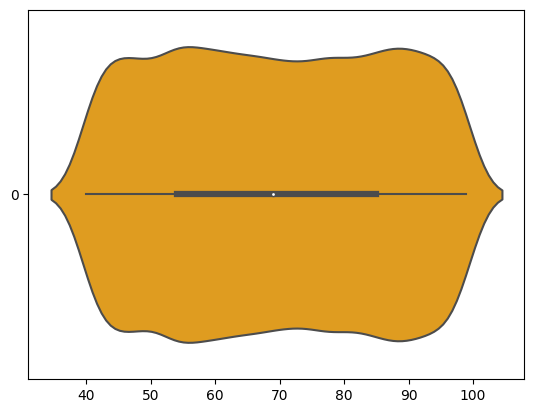

In [71]:
sns.violinplot(dataset['Previous Scores'], orient='h',color='orange')

# Relation between Past score and performance Index

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

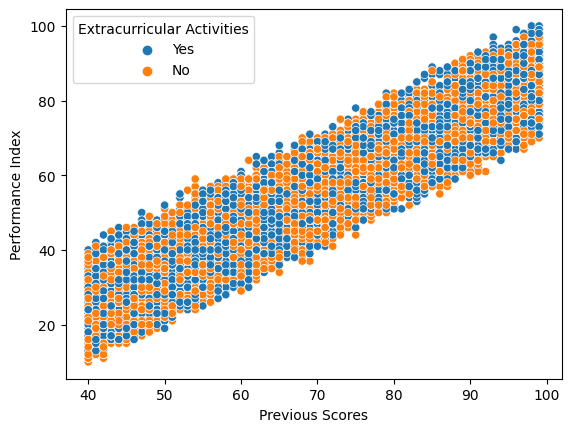

In [72]:
sns.scatterplot(x=dataset["Previous Scores"],y=dataset["Performance Index"],hue=dataset["Extracurricular Activities"])

# Feature Selection

<ipython-input-84-8451cfcb9584>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.drop("Performance Index",axis=1).corr(),annot=True)


<Axes: >

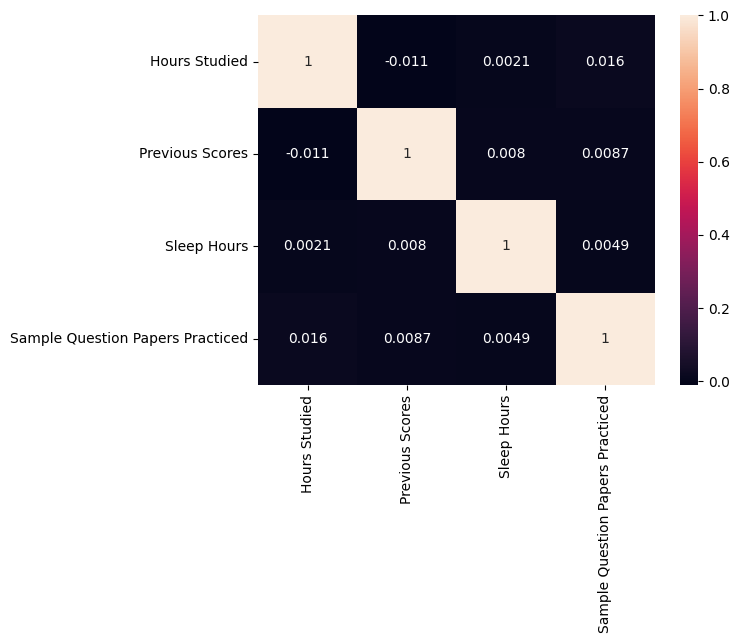

In [84]:
sns.heatmap(dataset.drop("Performance Index",axis=1).corr(),annot=True)

# Split Dataset to X ,y

In [73]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Data Distribution

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

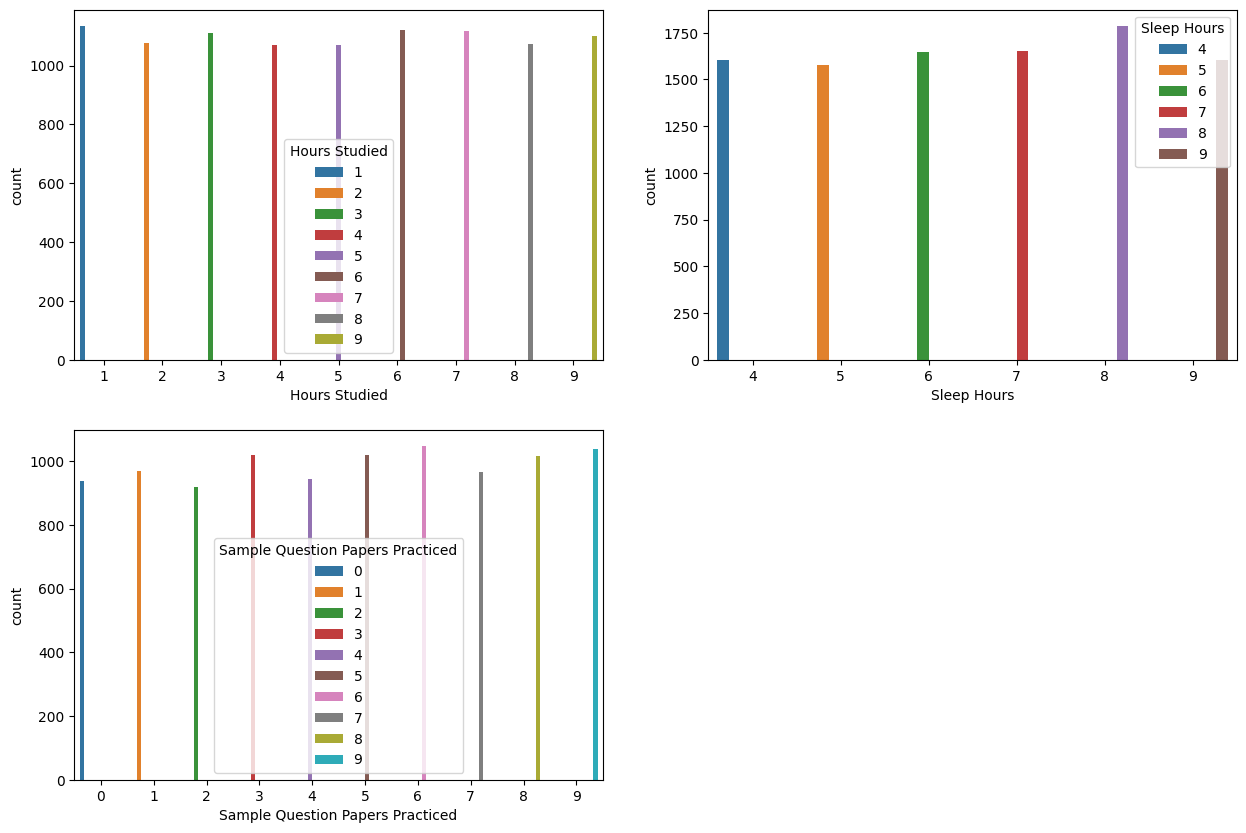

In [80]:
dataset.columns
col=['Hours Studied','Sleep Hours', 'Sample Question Papers Practiced']
plt.figure(figsize=(15,10))
j=1
for i in col:
  plt.subplot(2,2,j)
  sns.countplot(x=dataset[i],hue=dataset[i])
  j+=1
plt.tight_layout

# Encode Activity Feature to Binary

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X[:,2]=encoder.fit_transform(X[:,2])



# Split X,y to Train and Test datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)


# Calculate R2

In [ ]:
from sklearn.metrics import r2_score
y_predict=regressor.predict(X_test)
r2=r2_score(y_predict,y_test)
r2

# Linear regression in Polynomial Mode

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(X_train)
regressor2=LinearRegression()
regressor2.fit(x_poly,y_train)
poly_reg.transform(X_test).shape

# Calculate r2 in Polynomial Mode

In [ ]:
y_predict_poly=regressor2.predict(poly_reg.transform(X_test))
r2=r2_score(y_predict_poly,y_test)
r2